<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Денис! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

Импортируем ряд библиотек необходимых для анализа.

In [3]:
try:
    data = pd.read_csv('C:/Users/Денис/Desktop/python/model1/users_behavior.csv')
except:
    data = pd.read_csv('/datasets/users_behavior.csv')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Считываем данные.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Можно дополнительно посмотреть информацию о данных с помощью метода .head()
</div>

<div class="alert alert-info">
Привет! ок добавил head(). Он до этого стоял. Но что-то убрал перед отправкой. подумал не надо

Из представленных данных видно, что пропущенных данных нет. формат данных соответствует необходимым.

Описательная статистика столбца "calls":
Среднее: 63.04±0.59
Медиана: 62.0, межквартильный размах: 42.0
Минимальное значение: 0.0. Максимальное значение: 244.0.


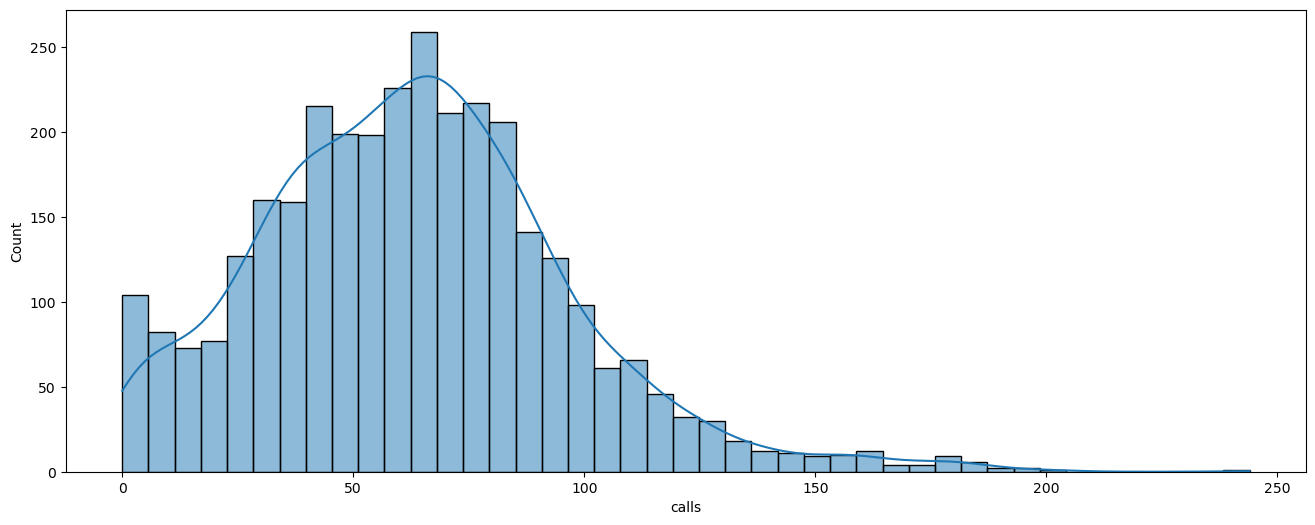

In [13]:
def description_and_plot (data, column):
    plt.figure(figsize=(16, 6))
    g = sns.histplot(data=data, x=data[column], kde=True)
    stat = data[column].describe()
    print(f'Описательная статистика столбца "{column}":\n'
          f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
          f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
          f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' );
    return 

description_and_plot(data=data, column='calls')

Распределение количества звонков на графике выглядит хорошо. Имеет форму нормального распределения.
Исправлять данные нет необходимости.
на последнем этапе убрал хвост и вместо всех значений больше 150 минут поставили 150 минут.
Сделано это было потому, что кто-то в чате написал, что никто не набрал Accuracy больше 0,8. Ну я решил сделать. Для этого немного подрезались пару переменных.

Описательная статистика столбца "minutes":
Среднее: 438.21±4.14
Медиана: 430.6, межквартильный размах: 297.35
Минимальное значение: 0.0. Максимальное значение: 1632.06.


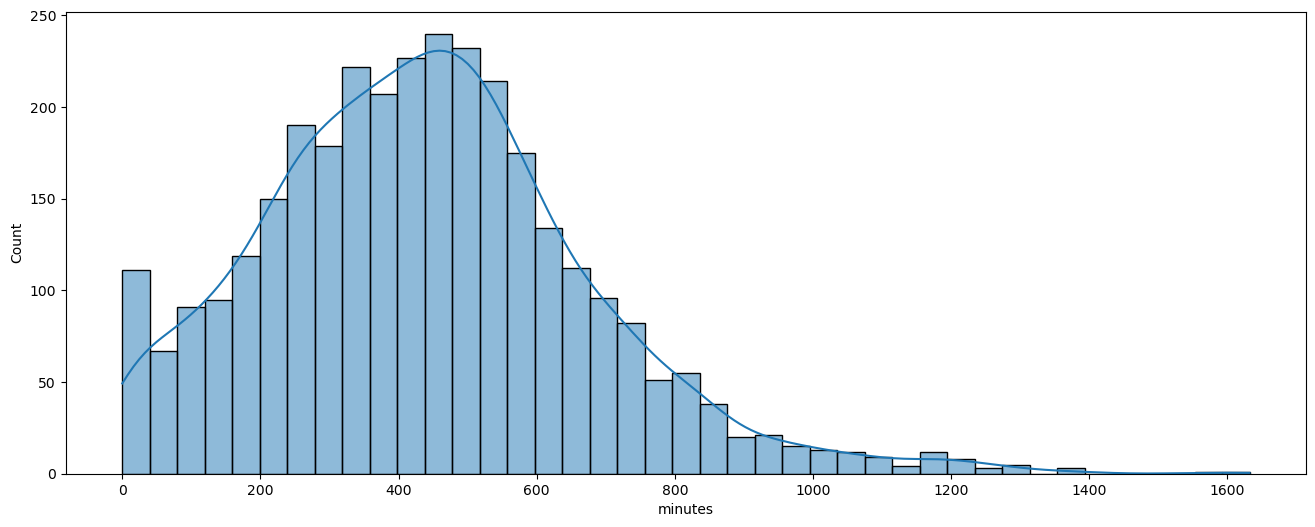

In [14]:
description_and_plot(data=data, column='minutes')
       

Распределение данных по количеству минут также имеет форму нормаьного распределения. обрезаны данные выше 1000 минут, с целью улучшения модели.

Описательная статистика столбца "messages":
Среднее: 38.28±0.64
Медиана: 30.0, межквартильный размах: 48.0
Минимальное значение: 0.0. Максимальное значение: 224.0.


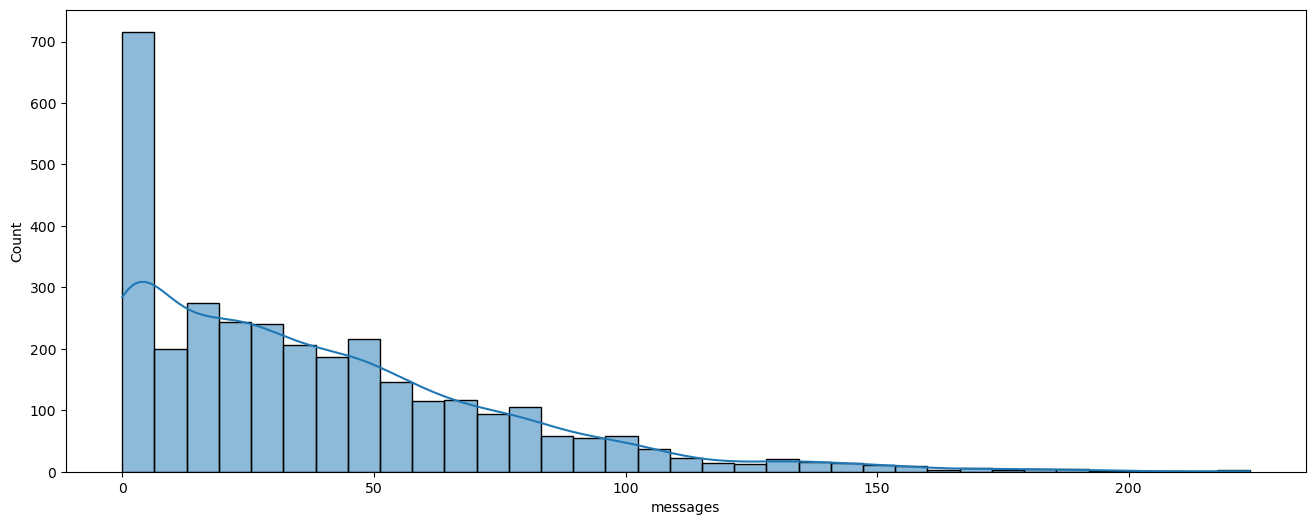

In [15]:
description_and_plot(data=data, column='messages')

Количество сообщений сильно разнится по количеству. Есть люди которые совсем не пишут сообщения. форма распределения не нормальная.

Описательная статистика столбца "mb_used":
Среднее: 17207.67±133.55
Медиана: 16943.24, межквартильный размах: 8932.8
Минимальное значение: 0.0. Максимальное значение: 49745.73.


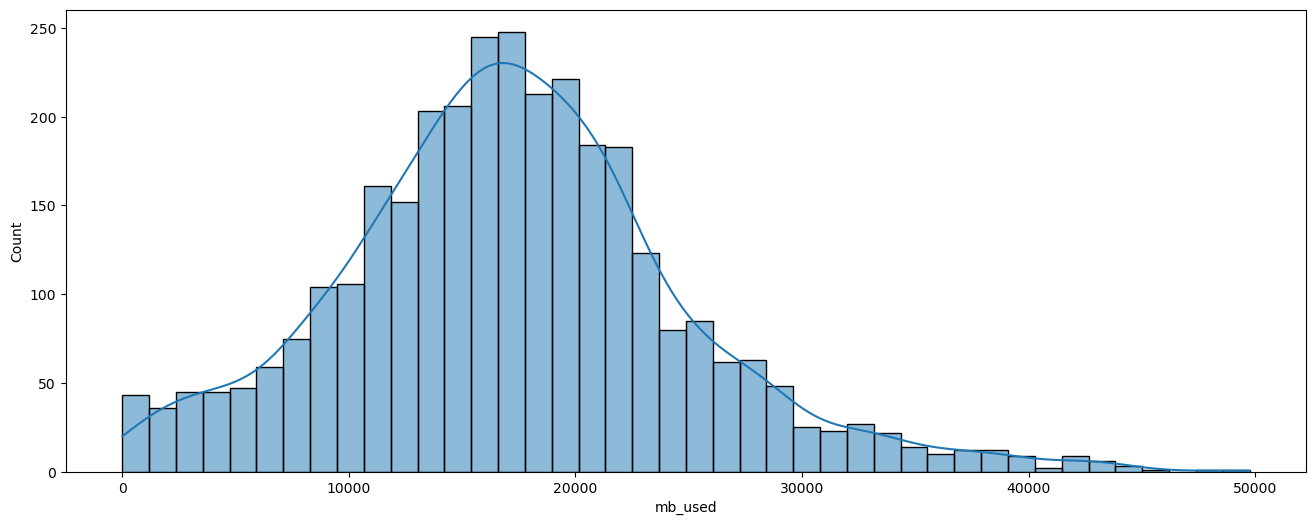

In [16]:
description_and_plot(data=data, column='mb_used')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Интересные графики. Осмелюсь дать пару советов:

Обрати внимание, что код построения графиков почти одинаковый. Нет смысла просто так дублировать одинаковый код - создай функцию и вызывай её при необходимости.

    
Посмотри на pairplot из библиотеки seaborn. Можо сразу проанализировать распределение данных в датафрейме.
    
    import seaborn as sns

    sns.pairplot(df, hue='is_ultra')
</div>

<div class="alert alert-info">
Спасибо. 
Добавил функцию.
Посмтроил снизу pairplot. Тоже люблю этот график. добавил его

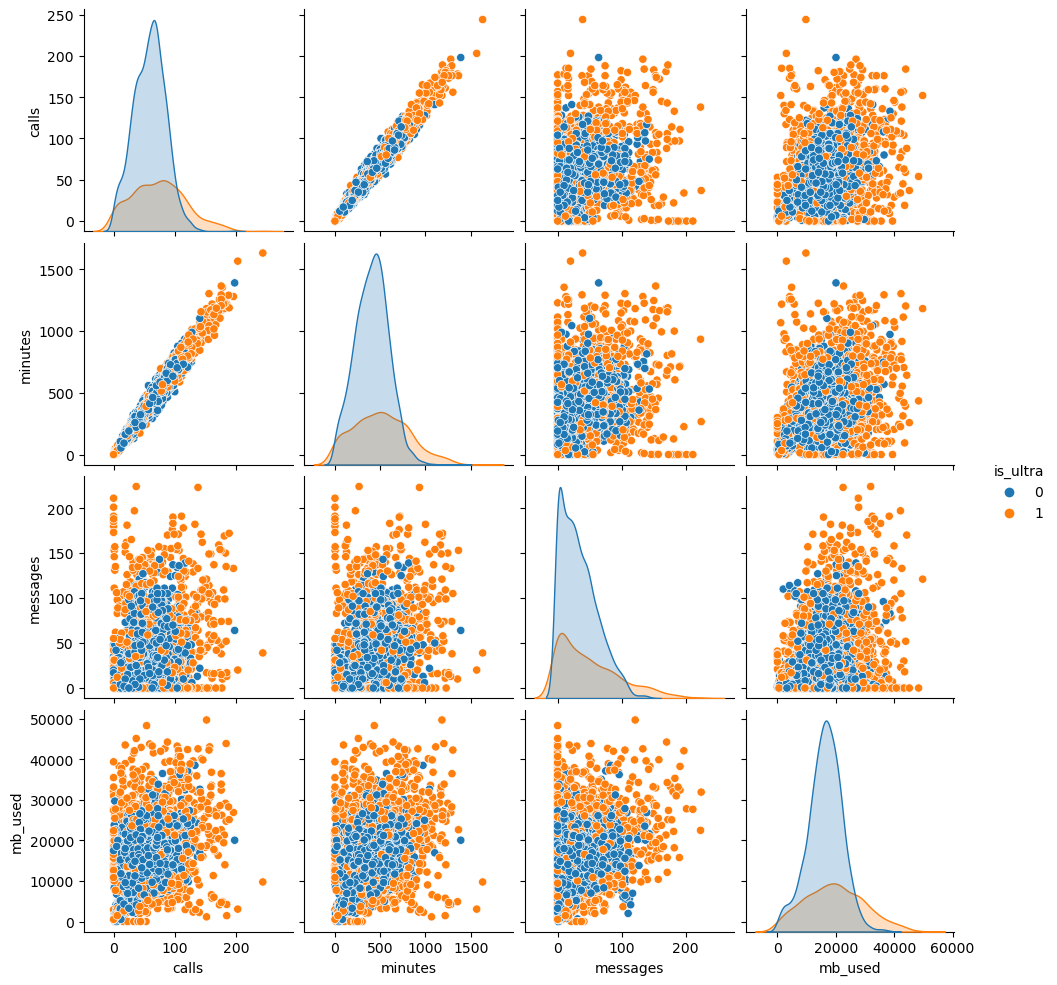

In [20]:
names = ['Ультра', 'Смарт']
sns.pairplot(data, hue='is_ultra');

Форма распределения по количеству трафика имеет практически идеальный вид нормального распределения.

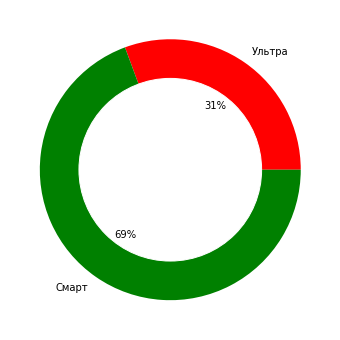

In [8]:
names = ['Ультра', 'Смарт']
plt.figure(figsize=(6, 6))

size = [data['is_ultra'].sum()/len(data['is_ultra']),1-data['is_ultra'].sum()/len(data['is_ultra'])]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green'], autopct='%1.f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Ок, исследован баланс классов, это хорошая практика</div>

Количество пользователей тарифа ультра практически в два раза ниже. очевидно , что больше людей предпочитают Смарт

## Разбейте данные на выборки

In [37]:
X = data.drop(['is_ultra'], axis=1)
y = data['is_ultra']

X_train, X_test_vr, y_train, y_test_vr = train_test_split(
    X, 
    y, 
    test_size=0.40, 
    random_state=12345,
    stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test_vr, 
    y_test_vr, 
    test_size=0.50, 
    random_state=12345,
    stratify=y_test_vr
)


print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_valid по классам: {np.bincount(y_valid)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

Количество строк в y_train по классам: [1337  591]
Количество строк в y_valid по классам: [446 197]
Количество строк в y_test по классам: [446 197]
(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Выборки получены корректно</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Совет:  обрати внимание на аргумент stratify функции train_test_split. Стратификация особенно важна, когда у нас мало данных и возможен дисбаланс классов в обучении / валидации / тесте.
</div>

<div class="alert alert-info">
Оки добавил stratify. Спасибо за подсказку, действиетльно это важно

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую явно вывести размеры получившихся выборок (с использованием .shape и print), это поможет быстро оценить корректность разделения на выборки.
</div>

<div class="alert alert-info">
Исправил

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Старайся не делать такие длинные строки. Стандарт PEP8 регулирует длину строки 79 символов. Придерживаться такого очень сложно, но лучше хотя-бы вмещать в экран, чтобы не приходилось использовать scroll.
    
    
А еще  если сомневаешься, как отформатировать правильно - всегда можно найти какой-нибудь оналйн-форматтер, например этот
    
  https://extendsclass.com/python-formatter.html
    
    
    
</div>

<div class="alert alert-info">
Исправил
    

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Данный комментарий скорее для развития, а в желтый цвет я его покрасил чтобы привлечь твое внимание. 
    
Обрати внимание на название переменных X_train/X_test.... Название не очень говорящее и не понятно что в этой переменой (особенно если встретишь её в коде). Есть сложившиеся наименования features_train или x_test.
</div>

<div class="alert alert-info">
Исправил. с Х и у удобнее. налдо было сразу так сделать

Рапределили выборки на 3 части 60/20/20 обучающая/валидирующая/тестовая

## Исследуйте модели

In [10]:
#X_train, y_train, X_valid, X_test, y_valid, y_test
best_model = None
best_result = 0
for i in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(X_train, y_train)
    result = model.score(X_valid, y_valid)
    if result > best_result:
        best_result = result 
        best_max_depth = i
print(f'best max_depth = {best_max_depth} : {best_result}')

best max_depth = 3 : 0.7853810264385692


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Дерево решений исследовано  корректно:
    
 - исследовано 10 значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

Совет: в sklearn есть инструменты для автоматического подбора лучших гиперпараметров (GridSearchCV и RandomSearchCV ).  Нужно понимать, что эти инструменты имеют свои сильные и слабые места, поэтому важно не только научиться применять его с точки зрения кода, но и понимать как он работает внутри (как минимум хорошо понять что такое кросс-валидация) явно представлять себе ограничения на применение. Так, например, в следующем проекте очень сложно правильно применить поиск по сетке.
    
Но в любом случае оставлю тебе ссылки для ознакомления.
    
https://academy.yandex.ru/handbook/ml/article/podbor-giperparametrov
    
https://newtechaudit.ru/gridsearchcv-pomoshhnik-v-vybore/
    
    
А вот эта статья поможет тебе не совершить "детские ошибки" в следующем проекте, если ты вдруг решишь использовтаь поиск по сетке для подбора гиперпараметров
    
https://datascience.xyz/practice/kak-delat-kross-validaciju-pri-apsemplinge-dannyh.html
    
    

</div>




посмотрели оптимальную глубину дерева. Оптимальным оказалась глубина 3. Что в принципе предсказуемо, так как переменных немного

In [11]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_valid, y_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_estimators = est#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_estimators = {best_n_estimators} : {best_result}')

best_n_estimators = 10 : 0.7838258164852255


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Случайный лес исследован корректно:
    
 - исследовано 10 значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

Подбор количества рандомных деревьев показал оптимальное количество в 10

In [12]:
model = LogisticRegression(solver='liblinear',
    # норма для регуляризации. 
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
model.fit(X_train, y_train) # обучите модель на тренировочной выборке
result = model.score(X_valid, y_valid) # посчитайте качество модели на валидационной выборке
print(f'result = {result}')

result = 0.749611197511664


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Логистическая регрессия исследована корректно.
</div>


Для логистической регрессии были поставлены рекомендуемые параметры.

In [13]:
best_model = None
best_result = 0
for neigh in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p = 2)
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_valid, y_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_neighbors = neigh#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_neighbors = {best_n_neighbors} : {best_result}')

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

best_n_neighbors = 4 : 0.7682737169517885


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК
</div>


Подбор оптимального количества соседей показал, что более оптимально подбирать область анализирую 4 соседа

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


,Classifier,Accuracy
0,MLPClassifier,0.664075
0,GaussianProcessClassifier,0.698289
0,SVC,0.706065
0,LogisticRegression,0.749611
0,KNeighborsClassifier,0.766719
0,AdaBoostClassifier,0.774495
0,GaussianNB,0.776050
0,QuadraticDiscriminantAnalysis,0.782271
0,RandomForestClassifier,0.783826
0,DecisionTreeClassifier,0.785381


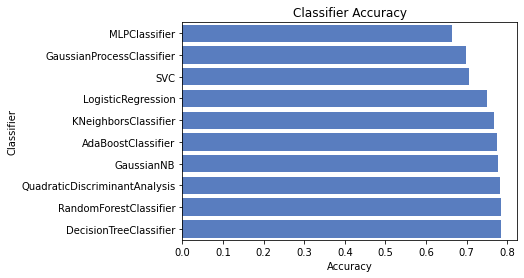

In [14]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state=12345, n_estimators = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = X_train
X_valid = X_valid
y_train = y_train
y_valid = y_valid

acc_dict = {}

memory = []

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    acc = clf.score(X_valid, y_valid)
    
    memory.append(clf)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, что изучаешь новые классификаторы, но позволь дать тебе совет. Не гонись за объемом/количеством.  Хорошо зная базовые алгоритмы (и принцип их работы, сильные/слабые стороны, какие гиперпараметры лучше применять в каких ситуациях) ты сможешь быстро достигать лучших  результатов, чем запуская многочасовые брутфорсы по десяткам моделей и бесполезным гиперпараметрам. 
    
А учитыая, что по своему интерфейсу (fit-predict) все модели в sklearn одинаковые, нарастить их количество "в ширь" ты сможешь всегда легко.    
</div>


Построили 10 моделей. в рейтинге по валидационной выборке поббедили модели деревьев. Причем метод рандомных деревьев показал себя лучше.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Пожалуйста, уточни какая именно модель стала лучше по оценкам на валидационной выборке и с какими гиперпараметрами...  Модели "Рандомные деревья" мы не изучали.</div>

## Проверьте модель на тестовой выборке

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
К данному этапу лучше подходить с одной выбранной моделью, чтобы избежать искушения вдруг "поменять" модель по  результатам тестирования. Ведь любое использование тестовой выборки для улучшения модели (в том числе выбор лучшей модели) - это нарушение.

Давай еще раз повторим, зачем мы используем каждую выборку:
  - На обучающей выборке мы подбираем параметры моделей (обучаем модели)
  - На валидационной выборке мы подбираем гиперпараметры, а также все остальные части решения, например предобработку данных, отбор признаков, методы борьбы с дисбалансом и т.д.
  - А тестовая выборка появляется только тогда, когда лучшая модель уже выбрана. И с её помощью мы получаем несмещенную оценку точности модели в эксплуатации.


Обычно этот комментарий желтый, но он покраснел т.к. на тестовой выборке резко вырвался AdaBoostClassifier, т.е. мы поменяли модель используя оценки на тестовой выборке.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>общий дизайн ML исследования</b>

В курсе мы используем следующую схему оценки качества алгоритмов:

1. Все данные делятся на 3 части: 
   - обучение,
   - валидация,
   - тест.

2. Каждый из алгоритмов будет обучен на обучающей выборке. 
3. Подбор гиперпараметров мы осуществляем с помощью оценки на валидационной выборке.
4. Когда гиперпараметры подобраны, качество каждого алгоритма мы оцениваем с помощью валидационной выборки.
    
5. Выбираем лучший по оценке на валидационной выборке.
6. И уже самый лучший алгоритм оцениваем по тестовой выборке.


Есть более системный вариант этой схемы, с использованием кросс-валидации. В этом случае  схема немного адаптируется. 

Все данные делятся на 2 части, первая будет использоваться для обучения и подбора гиперпараметров, и оценки алгоритмов с помощью кросс-валидации, вторая будет использоваться для финального тестирования.
    
    
Я советую до начала обучения моделей  решить для себя, какую стратегию стоит использовать в проекте (с кросс-валидацией или с выделением отдельной валидационной выборки).    


<b>Дополнительные материалы:</b>    
    
    
<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>        
        
    
<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a>, внимание двум последним страницам.
</div>

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Classifier,Accuracy
0,MLPClassifier,0.662519
0,GaussianProcessClassifier,0.671851
0,SVC,0.684292
0,LogisticRegression,0.743390
0,KNeighborsClassifier,0.748056
0,DecisionTreeClassifier,0.779160
0,QuadraticDiscriminantAnalysis,0.780715
0,GaussianNB,0.783826
0,RandomForestClassifier,0.788491
0,AdaBoostClassifier,0.800933


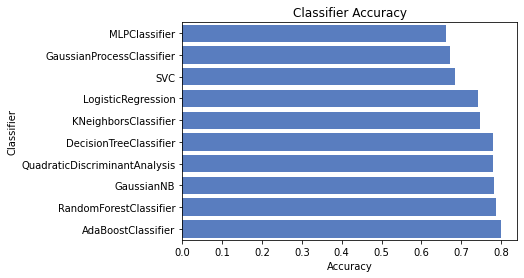

In [15]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state=12345, n_estimators = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

acc_dict = {}

for i in range(0,10):
    name = memory[i].__class__.__name__
    train_predictions = memory[i].predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

На тестовой выборке лучше всего показала себя модель адаптивного бустинга. Accuracy которой превысила 80%
так же хорошо себя показал метод рандомных деревьев. остальные модели показали себя несколько хуже. Рейтинг деревьев класификации потерял свое первенство.

## (бонус) Проверьте модели на адекватность

In [16]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)

dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(score)
    


0.6842923794712286


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец, верно применен Dummy Classifier для оценки стратегии предсказания самого частого ответа.</div>

С помощью DummyClassifier(по совету в чате) сделали модель, которая предсказывала значения не опираясь на данные предикторов. для дальнейшего сравнения показателей.

<Figure size 432x288 with 0 Axes>

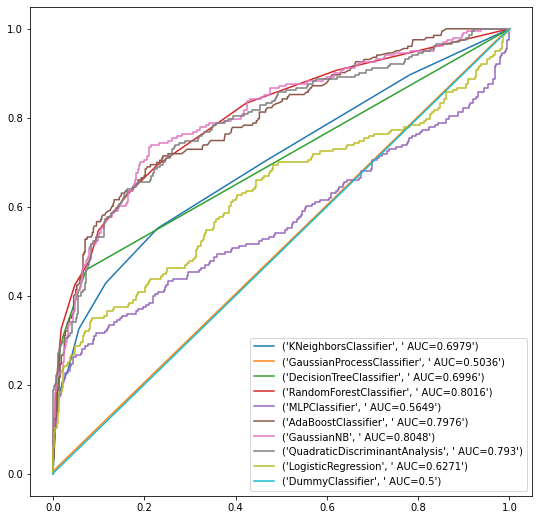

In [17]:
plt.figure(0).clf ();
plt.figure(figsize=(9, 9));
lst = [0,2,3,4,5,6,7,8,9]
for i in lst:
    y_pred = memory[i].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
    auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
    plt.plot (fpr,tpr,label=(memory[i].__class__.__name__, " AUC="+str(auc)));

y_pred = dclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('DummyClassifier', " AUC="+str(auc)));

#add legend
plt.legend();

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Анализ прогностической значимостьи с помощью ROC-кривых погазал, что наиболее хорошо показали себя 4 вида моделей. Среди которых оказались: Гауссовский наивный байесовский метод, метод рандомных деревьев, квадратичный дискриминационный анализ и модель адаптивного бустинга. 
По результатам всех изысканий рекомендуется использовать модель адаптивного бустинга или метод рандомных деревьев. 

## Проверьте модель переменных на категориальные
Возникла идея, что возможно модель будел лучше предсказывать если мы поменяем переменные на категориальные. попробуем проверить.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Молодец, что экспериментируешь с подходами. Но в ревью я ограничусь только оценкой и техническим иполнением ипользования новых признаков.  В остальном код идентичен предыдущему разделу. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В чем заключается главная проблема: то,что было нормальным в анализе данных в машинном обучении может стать источником утечек информации из тестовой и валидационных выборках в обучение. Например, для создания категорий ты используешь все данные. Между тем правильным подходом было бы вычислить категории по обучающей выборке и применить трансформации к валидационной и тестовой. Аналогично для encoder - все скалеры, энкодеры и векторайзеры (преобразующие данные) вначале обучаются на обучающей выборке и только потом применяются в валидационной и тестовой.</div>

In [18]:
data['Cat_calls'] = pd.cut(data['calls'], 5, precision=0)
data[['Cat_calls', 'is_ultra']].groupby(['Cat_calls'],).mean().sort_values(by='Cat_calls', ascending=False)        

,is_ultra
Cat_calls,
"(120.0, 150.0]",0.854430
"(90.0, 120.0]",0.507463
"(60.0, 90.0]",0.218834
"(30.0, 60.0]",0.221470
"(-0.0, 30.0]",0.342574


Наблюдается не линейная зависимость поэтому первые 3 группы объединим в одну

In [19]:
data['Cat_calls'] = encoder.fit_transform(data['Cat_calls'])

for i in range(len(data['Cat_calls'])):
    if (data.loc[i,'Cat_calls'] == 0) or (data.loc[i,'Cat_calls'] == 1) or (data.loc[i,'Cat_calls'] == 2):
        data.loc[i,'Cat_calls'] == 0
    elif data.loc[i,'Cat_calls'] == 3:
        data.loc[i,'Cat_calls'] == 1
    else: data.loc[i,'Cat_calls'] == 2

In [20]:
data['Cat_minutes'] = pd.cut(data['minutes'], 5, precision=0)
data[['Cat_minutes', 'is_ultra']].groupby(['Cat_minutes'],).mean().sort_values(by='Cat_minutes', ascending=False)

,is_ultra
Cat_minutes,
"(800.0, 1000.0]",0.808612
"(600.0, 800.0]",0.430085
"(400.0, 600.0]",0.217631
"(200.0, 400.0]",0.216667
"(-1.0, 200.0]",0.347107


Наблюдается не линейная зависимость поэтому первые 3 группы объединим в одну

In [21]:
data['Cat_minutes'] = encoder.fit_transform(data['Cat_minutes'])

for i in range(len(data['Cat_minutes'])):
    if (data.loc[i,'Cat_minutes'] == 0) or (data.loc[i,'Cat_minutes'] == 1) or (data.loc[i,'Cat_minutes'] == 2):
        data.loc[i,'Cat_minutes'] == 0
    elif data.loc[i,'Cat_minutes'] == 3:
        data.loc[i,'Cat_minutes'] == 1
    else: data.loc[i,'Cat_minutes'] == 2

In [22]:
data['Cat_messages'] = pd.cut(data['messages'], 5, precision=0)
data[['Cat_messages', 'is_ultra']].groupby(['Cat_messages'],).mean().sort_values(by='Cat_messages', ascending=False)

,is_ultra
Cat_messages,
"(179.0, 224.0]",1.000000
"(134.0, 179.0]",0.936508
"(90.0, 134.0]",0.533937
"(45.0, 90.0]",0.295294
"(-0.0, 45.0]",0.262827


In [23]:
data['Cat_messages'] = encoder.fit_transform(data['Cat_messages'])

In [24]:
data['Cat_mb_used'] = pd.cut(data['mb_used'], 5, precision=0)
data[['Cat_mb_used', 'is_ultra']].groupby(['Cat_mb_used'],).mean().sort_values(by='Cat_mb_used', ascending=False)

,is_ultra
Cat_mb_used,
"(39797.0, 49746.0]",1.000000
"(29847.0, 39797.0]",0.854167
"(19898.0, 29847.0]",0.361364
"(9949.0, 19898.0]",0.196043
"(-50.0, 9949.0]",0.383838


In [25]:
data['Cat_mb_used'] = encoder.fit_transform(data['Cat_mb_used'])

for i in range(len(data['Cat_mb_used'])):
    if (data.loc[i,'Cat_mb_used'] == 0) or (data.loc[i,'Cat_mb_used'] == 1) or (data.loc[i,'Cat_mb_used'] == 2):
        data.loc[i,'Cat_mb_used'] == 0
    elif data.loc[i,'Cat_mb_used'] == 3:
        data.loc[i,'Cat_mb_used'] == 1
    else: data.loc[i,'Cat_mb_used'] == 2

In [26]:
data.head()

,calls,minutes,messages,mb_used,is_ultra,Cat_calls,Cat_minutes,Cat_messages,Cat_mb_used
0,40.0,311.90,83.0,19915.42,0,1,1,1,2
1,85.0,516.75,56.0,22696.96,0,2,2,1,2
2,77.0,467.66,86.0,21060.45,0,2,2,1,2
3,106.0,745.53,81.0,8437.39,1,3,3,1,0
4,66.0,418.74,1.0,14502.75,0,2,2,0,1


In [27]:
predict = data.drop(['is_ultra','calls','minutes','messages','mb_used','Cat_messages'], axis=1)
target = data['is_ultra']

X_train, X_test_vr, y_train, y_test_vr = train_test_split(predict, target, test_size=0.40, random_state=12345)

X_valid, X_test, y_valid, y_test = train_test_split(X_test_vr, y_test_vr, test_size=0.50, random_state=12345)


Рапределили выборки на 3 части 60/20/20 обучающая/валидирующая/тестовая

## Исследуйте модели

In [28]:
#X_train, y_train, X_valid, X_test, y_valid, y_test
best_model = None
best_result = 0
for i in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(X_train, y_train)
    result = model.score(X_valid, y_valid)
    if result > best_result:
        best_result = result 
        best_max_depth = i
print(f'best max_depth = {best_max_depth} : {best_result}')

best max_depth = 7 : 0.7807153965785381


посмотрели оптимальную глубину дерева. Оптимальным оказалась глубина 7. Что в принципе предсказуемо, так как переменных немного

In [29]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_valid, y_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_estimators = est#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_estimators = {best_n_estimators} : {best_result}')

best_n_estimators = 2 : 0.7807153965785381


Подбор количества рандомных деревьев показал оптимальное количество в 2

In [30]:
model = LogisticRegression(solver='liblinear',
    # норма для регуляризации. 
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
model.fit(X_train, y_train) # обучите модель на тренировочной выборке
result = model.score(X_valid, y_valid) # посчитайте качество модели на валидационной выборке
print(f'result = {result}')

result = 0.7387247278382582


Для логистической регрессии были поставлены рекомендуемые параметры.

In [31]:
best_model = None
best_result = 0
for neigh in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p = 2)
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_valid, y_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_neighbors = neigh#  сохраните наилучшее значение метрики accuracy на валидационных данных

print(f'best_n_neighbors = {best_n_neighbors} : {best_result}')

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

best_n_neighbors = 6 : 0.7667185069984448


Подбор оптимального количества соседей показал, что более оптимально подбирать область анализирую 4 соседа

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Classifier,Accuracy
0,LogisticRegression,0.738725
0,KNeighborsClassifier,0.746501
0,QuadraticDiscriminantAnalysis,0.772939
0,MLPClassifier,0.774495
0,GaussianNB,0.774495
0,SVC,0.777605
0,GaussianProcessClassifier,0.777605
0,AdaBoostClassifier,0.779160
0,DecisionTreeClassifier,0.780715
0,RandomForestClassifier,0.780715


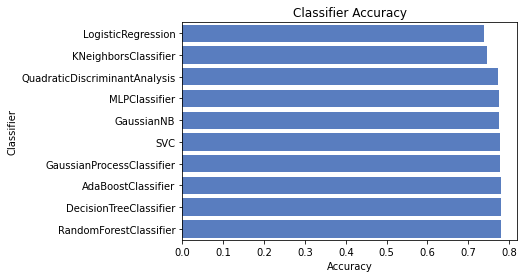

In [32]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 7),
    RandomForestClassifier(random_state=12345, n_estimators = 2),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = X_train
X_valid = X_valid
y_train = y_train
y_valid = y_valid

acc_dict = {}

memory = []

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    acc = clf.score(X_valid, y_valid)
    
    memory.append(clf)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

Построили 10 моделей. в рейтинге по валидационной выборке поббедили модели деревьев. Причем метод рандомных деревьев показал себя лучше.

## Проверьте модель на тестовой выборке

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Classifier,Accuracy
0,KNeighborsClassifier,0.734059
0,LogisticRegression,0.737170
0,SVC,0.772939
0,GaussianNB,0.774495
0,QuadraticDiscriminantAnalysis,0.776050
0,DecisionTreeClassifier,0.777605
0,RandomForestClassifier,0.777605
0,AdaBoostClassifier,0.777605
0,GaussianProcessClassifier,0.782271
0,MLPClassifier,0.783826


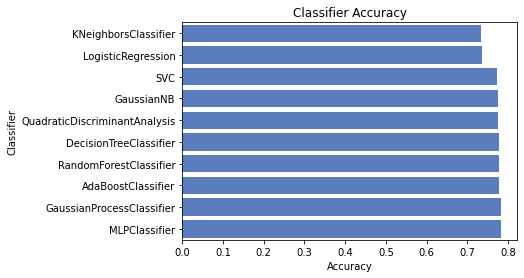

In [33]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2), 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state=12345, n_estimators = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    LogisticRegression(# метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

acc_dict = {}

for i in range(0,10):
    name = memory[i].__class__.__name__
    train_predictions = memory[i].predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

Рейтинг деревьев класификации потерял свое первенство.

## (бонус) Проверьте модели на адекватность

In [34]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)

dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(score)
    


0.6842923794712286


С помощью DummyClassifier(по совету в чате) сделали модель, которая предсказывала значения не опираясь на данные предикторов. для дальнейшего сравнения показателей.

<Figure size 432x288 with 0 Axes>

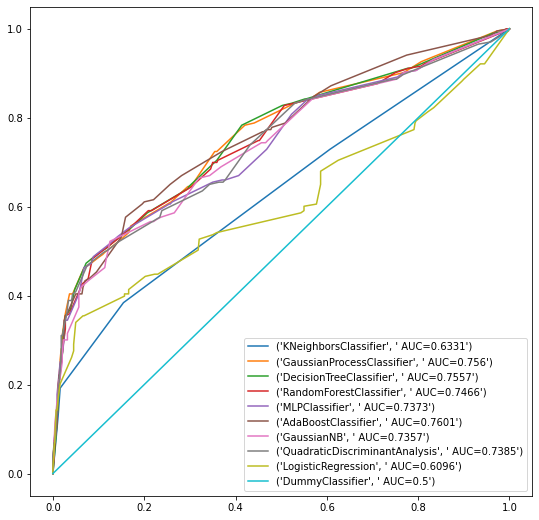

In [35]:
plt.figure(0).clf ();
plt.figure(figsize=(9, 9));
lst = [0,2,3,4,5,6,7,8,9]
for i in lst:
    y_pred = memory[i].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
    auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
    plt.plot (fpr,tpr,label=(memory[i].__class__.__name__, " AUC="+str(auc)));

y_pred = dclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('DummyClassifier', " AUC="+str(auc)));

#add legend
plt.legend();

В целом улучшить прогнозирование не получилось. япредсказание без категорирования переменных оказалось лучше. 

## Общие выводы

Были проанализированы данные о поведении клиентов, которые уже перешли на эти тарифы.
Мы попытались построить модель для задачи классификации, которая выберет подходящий тариф. 

Считали данные. Из представленных данных видно, что пропущенных данных нет. формат данных соответствует необходимым.
Распределение количества звонков на графике выглядит хорошо. Имеет форму нормального распределения.
Исправлять данные нет необходимости. На последнем этапе убрал хвост и вместо всех значений больше 150 минут поставили 150 минут.
Распределение данных по количеству минут также имеет форму нормаьного распределения. Обрезаны данные выше 1000 минут, с целью улучшения модели.
Количество сообщений сильно разнится по количеству. Есть люди которые совсем не пишут сообщения. форма распределения не нормальная.
Форма распределения по количеству трафика имеет практически идеальный вид нормального распределения.

Количество пользователей тарифа ультра практически в два раза ниже. очевидно , что больше людей предпочитают Смарт

Рапределили выборки на 3 части 60/20/20 обучающая/валидирующая/тестовая

Нашли оптимальную глубину дерева. Оптимальным оказалась глубина 3. 
Подбор количества рандомных деревьев показал оптимальное количество в 10
Подбор оптимального количества соседей показал, что более оптимально подбирать область анализирую 4 соседа
Построили 10 моделей. в рейтинге по валидационной выборке поббедили модели деревьев. Причем метод рандомных деревьев показал себя лучше.
Однако на тестовой выборке лучше всего показала себя модель адаптивного бустинга. Accuracy которой превысила 80%
так же хорошо себя показал метод рандомных деревьев. остальные модели показали себя несколько хуже. Рейтинг деревьев класификации потерял свое первенство.
С помощью DummyClassifier сделали модель, которая предсказывала значения не опираясь на данные предикторов. для дальнейшего сравнения показателей.

Анализ прогностической значимостьи с помощью ROC-кривых погазал, что наиболее хорошо показали себя 4 вида моделей. Среди которых оказались: Гауссовский наивный байесовский метод, метод рандомных деревьев, квадратичный дискриминационный анализ и модель адаптивного бустинга. 
По результатам всех изысканий рекомендуется использовать модель адаптивного бустинга или метод рандомных деревьев. 

Также была попытка поменять переменные на категориальные. Но такая замена не улучшила модель. 

В целом исследование показало, что можно построить достаточно хорошую модель с уровнем правильных предсказаний 80%

Для дальнейшего улучшения моделей стоит обработать данные в низких значениях показателей, так как они имеют не линейную зависимость. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне с минимальными помарками.
Также работа выглядит аккуратной и хорошо оформленной.
Вижу, что тебе дается python, и инструментарий машинного обучения.
Ты активно изучаешь новые инструменты, экспериментируешь, учишься. Это круто.    
 
Нужно исправить два момента:
 
 - На этапе тестирования мы оцениваем одну лучшую модель. Выбор модели мы осущетсвляем по валидационной выборке или кросс-валидации
 - Любые преобразования данных настраиваются по обучающей выборке.
    
Учитывая твою любознательность оставлю тебе немного шпаргалок по использованию кросс-валидации и поиска по сетке.    
     
Жду твой проект на финальное ревью :)
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Что такое кросс-валидация</b>:

Это более системный подход, альтернатива стандартной валидационной выборке.  При кросс-валидации выборка делится на k блоков примерно одинакового размера.  Далее по очереди каждый из этих блоков используется для оценки модели (в качестве валидационной выборки), остальные используются в качестве обучающей выборки. 

После того, как каждый из блоков будет использован в качестве валидационного, мы получим k оценок качества модели. Усредняя эти оценки мы получаем оценку модели по кросс-валидации.



    
<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>        
    

<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a> , кросс-валидация подбробно разобрана на последних двух страницах.   
 
    

    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Как узнать оценку по кросс-валидации при использовании поиска по сетке?</b>
 Оценка хранится в атрибуте best_score_

	from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
	gsearch.fit(X, y)	
	print(f’ качество модели по кросс-валидации равно {gsearch.best_score_}’)
    
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Документация</a>    


<b>Как узнать оценку по кросс-валидации если гиперпараметры не подбирались?</b>
Просто применяем кросс-валидацию

	from sklearn.model_selection import cross_val_score

    scores_list = cross_val_score(estimator=model, 
                                  X=features_train, 
                                  y=y_train, 
                                  cv=5,  
                                  scoring=scorer)
    
    val_score = scores_list.mean()
    

    
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Документация</a>    




</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Используем GridSearchCV правильно</b>

При создании объекта GridSearchCV важно определить следующие составляющие:
  
  - estimator - модель, для которой будем подбирать гиперпарметры
  - param_grid  - (пространство параметров)
  - cv - схема кросс-валидации
  - scoring скорер (функция для оценки, оптимизируемая метрика)  
    
    

    from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
    
    
Важно определить все составляющие, т.к. если мы что-то упустим, то они будут заменены на значения по умолчанию:
  
  - cv = 5 (стандартная кросс-валидация по 5 фолдам)
  - scoring = 'accuracy' для задачи классификации и 'r2' для регрессии. 
     
    
Часто можно использовать стандартный скорер из библиотеки sklearn (<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">ссылка</a>), или создать собственный с помощью функции <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html">make_scorer</a>   
    
Как узнать, какие гиперпараметры можно подбирать? 
    
    model.get_params().keys()
    
  
    
    
    
Следующим шагом мы обучаем полученный объект на обучающей выборке:
    

    gsearch.fit(X, y)	

Теперь, когда объект GridSearchCV обучен, нужно посмотреть, какую информацию мы можем извлечь из него.
    
Лучшая модель хранится в атрибуте best_estimator_
    
    gsearch.best_estimator_
    
Оценка лучшей модели, полученная с помощью кросс-валидации хранится в атрибуте best_score_
    
    gsearch.best_score_
    
Параметры лучшей модели хранятся в атрубите best_params_
    
    gsearch.best_params_
    

    
Таким образом, один раз обучив объект GridSearchCV мы сразу получаем и лучшую модель и лучшие гиперпараметры и оценку модели полученную с помощью кросс-валидации. И нет  необходимости в дополнительном обучении модели и определении метрик по выделенной валидационной выборке.      
    
    
<a href="https://scikit-learn.org/stable/modules/grid_search.html">Документация</a>    




</div>